First few rows of the dataset:
                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1   05/04/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3   01/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398             5        423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist R

C:\Users\geeso\AppData\Local\Temp\ipykernel_2072\3580130476.py:66: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Deezer Playlist Count', 'Amazon Playlist Count']].corr()


Mean Squared Error: 2538.15
R-squared: 0.43


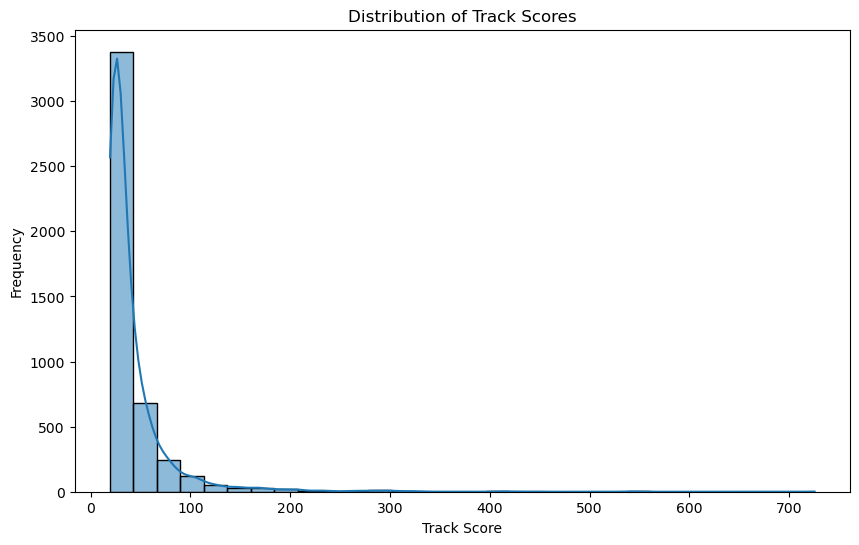

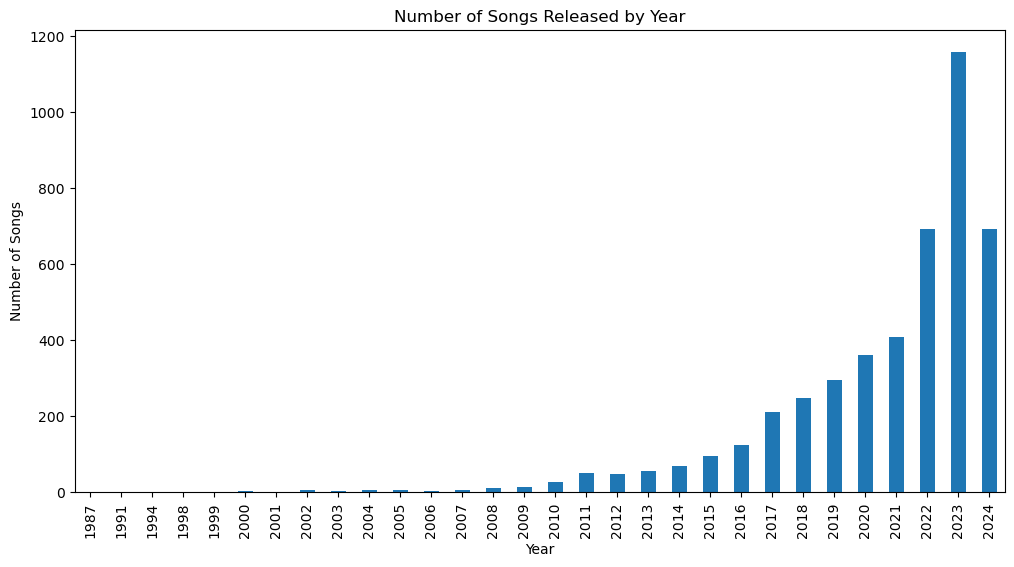

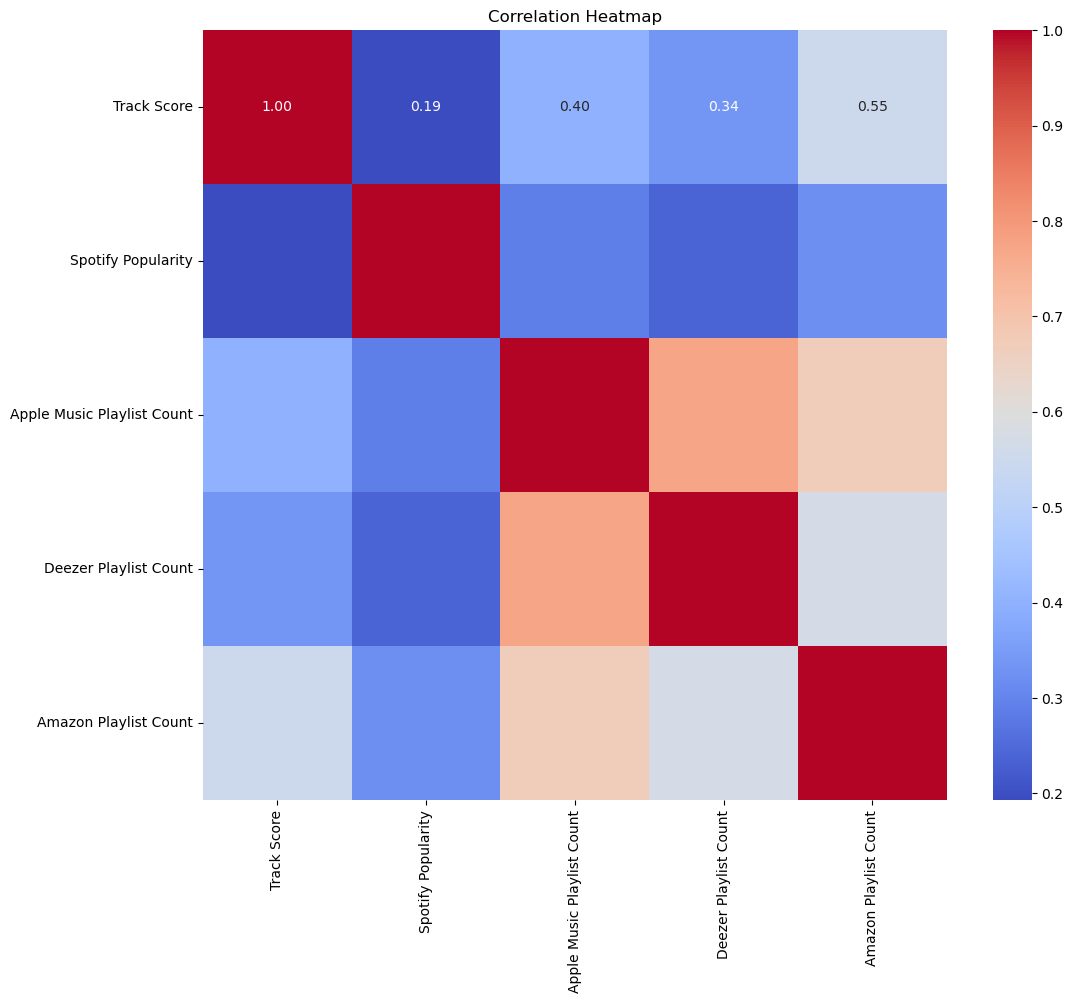

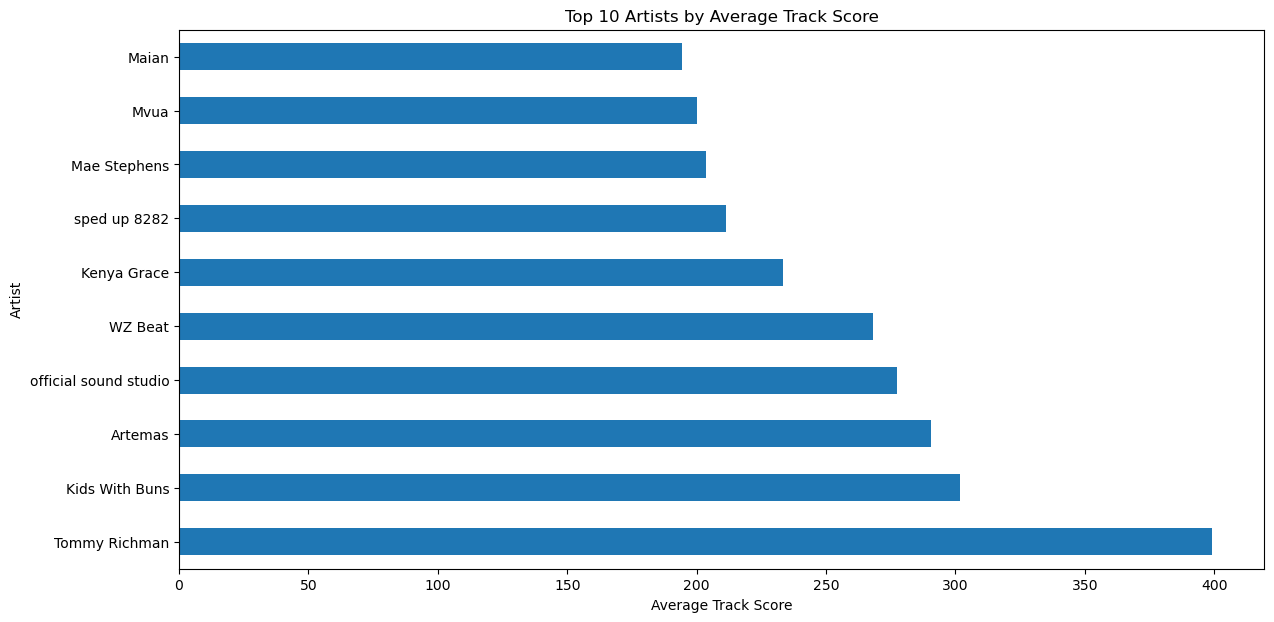

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset from a CSV file into a DataFrame
# Specify encoding to handle special characters in the data
df = pd.read_csv("Most Streamed Spotify Songs 2024.csv", encoding='ISO-8859-1')

# Display the first few rows of the dataset to get an initial look at the data
print("First few rows of the dataset:")
print(df.head())

# Print the shape of the dataset, which shows the number of rows and columns
print(f"Dataset shape: {df.shape}")

# Display information about the DataFrame including data types and non-null counts
print("Dataset info:")
df.info()

# Show statistical summary for numerical columns in the DataFrame
print("Dataset description:")
print(df.describe())

# Check for missing values in each column and print the count of missing values
print("Missing values count per column:")
print(df.isnull().sum())

# Drop the column 'TIDAL Popularity' as it is not needed for analysis
df.drop(['TIDAL Popularity'], axis=1, inplace=True)

# Convert the 'Release Date' column to datetime format for easier manipulation
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Print the number of duplicated rows before removal
print(f"Number of duplicated rows before removal: {df.duplicated().sum()}")
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Plot the distribution of 'Track Score' with a histogram and (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(df['Track Score'], bins=30, kde=True)
plt.title('Distribution of Track Scores')
plt.xlabel('Track Score')
plt.ylabel('Frequency')


# Extract the release year from the 'Release Date' column
df['Release Year'] = df['Release Date'].dt.year

# Plot the number of songs released each year as a bar chart
plt.figure(figsize=(12, 6))
df['Release Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Songs Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')


# Calculate the correlation matrix for selected features and plot a heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[['Track Score', 'Spotify Popularity', 'YouTube Views', 
                         'TikTok Views', 'Apple Music Playlist Count', 
                         'Deezer Playlist Count', 'Amazon Playlist Count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')


# Group by 'Artist' and calculate the average 'Track Score' for each artist
# Then plot the top 10 artists with the highest average track scores as a horizontal bar chart
plt.figure(figsize=(14, 7))
top_artists = df.groupby('Artist')['Track Score'].mean().sort_values(ascending=False).head(10)
top_artists.plot(kind='barh')
plt.title('Top 10 Artists by Average Track Score')
plt.xlabel('Average Track Score')
plt.ylabel('Artist')



# List of columns to clean
columns_to_clean = ['Spotify Popularity', 'YouTube Views', 'TikTok Views', 
                     'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count']

# Clean each column 
for column in columns_to_clean:
    # Convert column to string, remove commas, and convert to float
    df[column] = df[column].astype(str).str.replace(',', '', regex=True).astype(float)

# Drop rows with missing values after cleaning
df = df.dropna()  # You could also use df.fillna() to impute missing values

# Define features (independent variables) and target (dependent variable) for modeling
features = ['Spotify Popularity', 'YouTube Views', 'TikTok Views', 
             'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count']
target = 'Track Score'

# Prepare feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets with 20% of the data as the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise the StandardScaler to standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialise the Linear Regression model
model = LinearRegression()
# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error of the predictions
r2 = r2_score(y_test, y_pred)              # R-squared (coefficient of determination) score

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")



In [2]:

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 2538.15
R-squared: 0.43
